In [2]:
from sympy import *
from fractions import Fraction
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import hypergeom
from scipy.stats import nbinom
from scipy.stats import expon
from scipy.stats import norm
from IPython.display import display, Latex, HTML, Math
import statsmodels.api as sm
from scipy import stats
import numpy as np
import sympy as sp
import math as math
from matplotlib import pyplot as plt
from sympy.abc import t
from IPython.display import display, Math, Latex
import numpy as np
%matplotlib inline
x, y, z, t, u, c = symbols('x y z t u c')
sp.init_printing() 

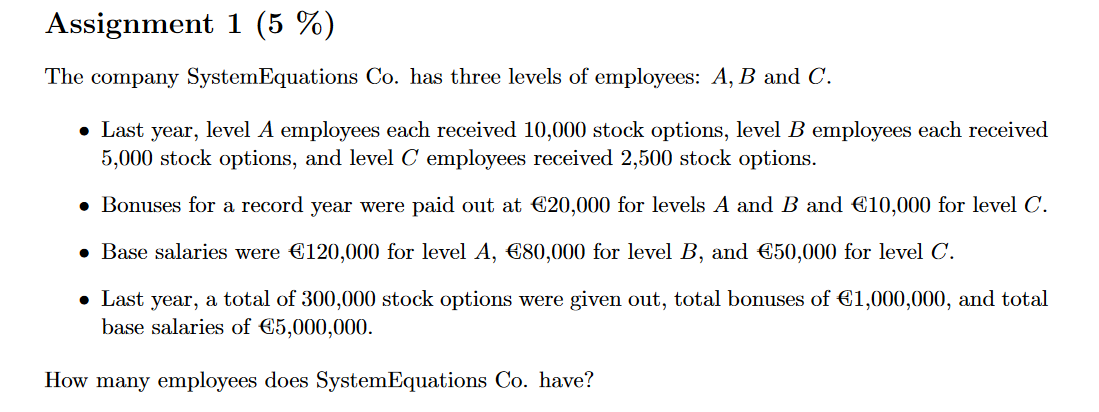

In [3]:
print("=== SystemEquations Co. Employee Problem - Matrix Solution ===\n")

# Define the problem as a matrix equation Ax = b
print("Setting up the matrix equation Ax = b:")
print("where x = [a, b, c] = [Level A, Level B, Level C employees]\n")

# Coefficient matrix A
A = Matrix([
    [10000, 5000, 2500],    # Stock options: 10,000a + 5,000b + 2,500c = 300,000
    [20000, 20000, 10000],  # Bonuses: 20,000a + 20,000b + 10,000c = 1,000,000  
    [120000, 80000, 50000]  # Salaries: 120,000a + 80,000b + 50,000c = 5,000,000
])

# Constants vector b
b = Matrix([300000, 1000000, 5000000])

print("Coefficient matrix A:")
sp.pprint(A)
print("\nConstants vector b:")
sp.pprint(b)

print("\n" + "="*60)

# Solve using matrix operations: x = A^(-1) * b
print("Solving Ax = b using matrix inversion: x = A^(-1) * b\n")

# Calculate A inverse
A_inv = A.inv()
print("A^(-1) =")
sp.pprint(A_inv)

print("\nSolution vector x = A^(-1) * b:")
x = A_inv * b
sp.pprint(x)

print("\n" + "="*60)

=== SystemEquations Co. Employee Problem - Matrix Solution ===

Setting up the matrix equation Ax = b:
where x = [a, b, c] = [Level A, Level B, Level C employees]

Coefficient matrix A:
⎡10000   5000   2500 ⎤
⎢                    ⎥
⎢20000   20000  10000⎥
⎢                    ⎥
⎣120000  80000  50000⎦

Constants vector b:
⎡300000 ⎤
⎢       ⎥
⎢1000000⎥
⎢       ⎥
⎣5000000⎦

Solving Ax = b using matrix inversion: x = A^(-1) * b

A^(-1) =
⎡1/5000   -1/20000     0    ⎤
⎢                           ⎥
⎢1/5000    1/5000   -1/20000⎥
⎢                           ⎥
⎣-1/1250  -1/5000   1/10000 ⎦

Solution vector x = A^(-1) * b:
⎡10⎤
⎢  ⎥
⎢10⎥
⎢  ⎥
⎣60⎦



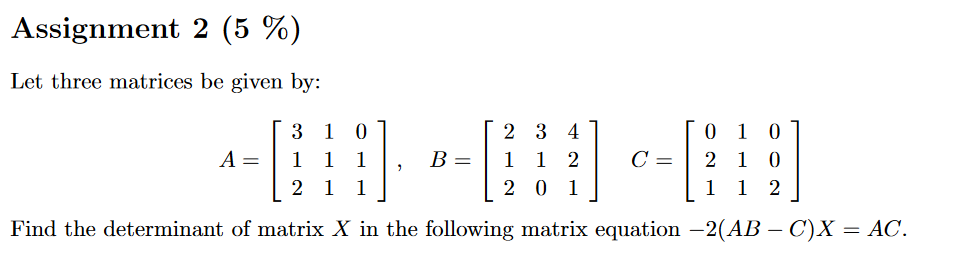

In [4]:
A = Matrix([
    [3, 1, 0],
    [1, 1, 1], 
    [2, 1, 1]
])

B = Matrix([
    [2, 3, 4],
    [1, 1, 2],
    [2, 0, 1]
])

C = Matrix([
    [0, 1, 0],
    [2, 1, 0],
    [1, 1, 2]
])


print("\n" + "="*60)

# Step 1: Calculate AB
print("Step 1: Calculate AB")
AB = A * B
print("AB =")
sp.pprint(AB)

print("\n" + "="*60)

# Step 2: Calculate AB - C
print("Step 2: Calculate AB - C")
AB_minus_C = AB - C
print("AB - C =")
sp.pprint(AB_minus_C)

print("\n" + "="*60)

# Step 3: Calculate AC (right-hand side)
print("Step 3: Calculate AC")
AC = A * C
print("AC =")
sp.pprint(AC)

print("\n" + "="*60)


# Step 4: Solve for X from -2(AB - C)X = AC
print("Step 4: Solve for X")
print("From -2(AB - C)X = AC")
print("We get: X = -1/2 * (AB - C)^(-1) * AC")

# Calculate (AB - C)^(-1)
AB_minus_C_inv = AB_minus_C.inv()
print("\n(AB - C)^(-1) =")
sp.pprint(AB_minus_C_inv)

# Calculate X
X = -sp.Rational(1,2) * AB_minus_C_inv * AC
print("\nX = -1/2 * (AB - C)^(-1) * AC =")
sp.pprint(X)

print("\n" + "="*60)

# Step 5: Calculate determinant of X
print("Step 5: Calculate det(X)")
det_X = X.det()
print(f"det(X) = {det_X}")

print("\n" + "="*60)


Step 1: Calculate AB
AB =
⎡7  10  14⎤
⎢         ⎥
⎢5  4   7 ⎥
⎢         ⎥
⎣7  7   11⎦

Step 2: Calculate AB - C
AB - C =
⎡7  9  14⎤
⎢        ⎥
⎢3  3  7 ⎥
⎢        ⎥
⎣6  6  9 ⎦

Step 3: Calculate AC
AC =
⎡2  4  0⎤
⎢       ⎥
⎢3  3  2⎥
⎢       ⎥
⎣3  4  2⎦

Step 4: Solve for X
From -2(AB - C)X = AC
We get: X = -1/2 * (AB - C)^(-1) * AC

(AB - C)^(-1) =
⎡-1/2  1/10   7/10 ⎤
⎢                  ⎥
⎢1/2   -7/10  -7/30⎥
⎢                  ⎥
⎣ 0     2/5   -1/5 ⎦

X = -1/2 * (AB - C)^(-1) * AC =
⎡       -11       ⎤
⎢-7/10  ────  -4/5⎥
⎢        20       ⎥
⎢                 ⎥
⎢        31    14 ⎥
⎢9/10    ──    ── ⎥
⎢        60    15 ⎥
⎢                 ⎥
⎣-3/10  -1/5  -1/5⎦

Step 5: Calculate det(X)
det(X) = 1/60



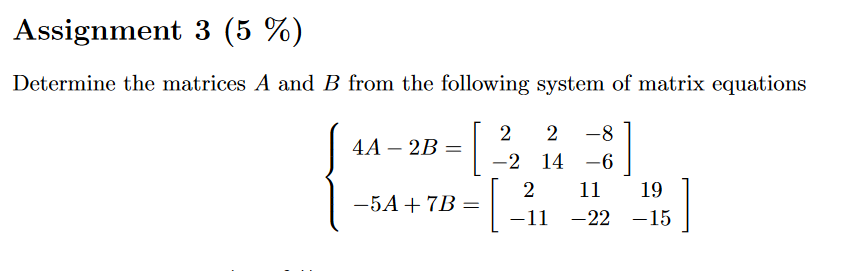

In [5]:
# Given system:
# 4A - 2B = RHS1
# -5A + 7B = RHS2

RHS1 = Matrix([[2, 2, -8], [-2, 14, -6]])
RHS2 = Matrix([[-2, 11, 19], [-11, -22, -15]])

print("System:")
print("4A - 2B ="), sp.pprint(RHS1)
print("-5A + 7B ="), sp.pprint(RHS2)

# Solve using elimination method
# Multiply eq1 by 7, eq2 by 2, then add to eliminate B
# 28A - 14B + (-10A + 14B) = 7*RHS1 + 2*RHS2
# 18A = 7*RHS1 + 2*RHS2

A = (7 * RHS1 + 2 * RHS2) / 18
B = (4 * A - RHS1) / 2

print("\nSolution:")
print("A =")
sp.pprint(A)
print("\nB =")
sp.pprint(B)

# Quick verification
print("\nVerification:")
print("4A - 2B =", (4*A - 2*B) == RHS1)
print("-5A + 7B =", (-5*A + 7*B) == RHS2)

System:
4A - 2B =
⎡2   2   -8⎤
⎢          ⎥
⎣-2  14  -6⎦
-5A + 7B =
⎡-2   11   19 ⎤
⎢             ⎥
⎣-11  -22  -15⎦

Solution:
A =
⎡5/9  2  -1⎤
⎢          ⎥
⎣-2   3  -4⎦

B =
⎡1/9  3   2 ⎤
⎢           ⎥
⎣-3   -1  -5⎦

Verification:
4A - 2B = True
-5A + 7B = True


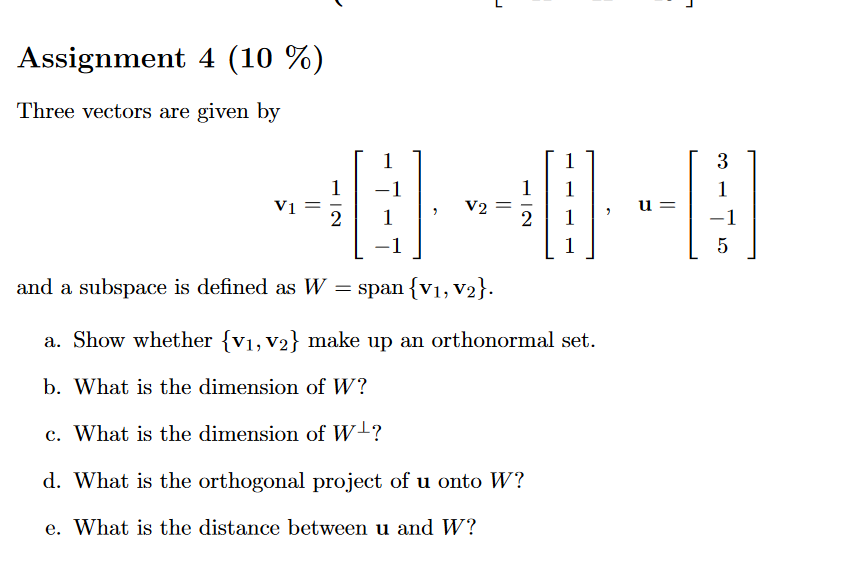

In [6]:
v1 = Rational(1,2) * Matrix([[1], [-1], [1], [-1]])
v2 = Rational(1,2) * Matrix([[1], [1], [1], [1]])
u = Matrix([[3], [1], [-1], [5]])

# a. Orthonormal check
dot_v1_v1 = v1.dot(v1)
dot_v2_v2 = v2.dot(v2)
dot_v1_v2 = v1.dot(v2)
orthonormal = (dot_v1_v1 == 1 and dot_v2_v2 == 1 and dot_v1_v2 == 0)
print("Orthonormal:", orthonormal)

#b dim(W) = num of linearly independent vectors = 2
#C dim(W⊥) = dim(V)-dim(W) = 4-2 = 2

# d. Orthogonal projection
proj_u = u.dot(v1) * v1 + u.dot(v2) * v2
print("Orthogonal projection:", proj_u)

#e. the distance between u and proj_u is the norm of the vector u-proj_u
distance = sqrt((u-proj_u).dot(u-proj_u))
print("Distance:", distance)

Orthonormal: True
Orthogonal projection: Matrix([[1], [3], [1], [3]])
Distance: 4


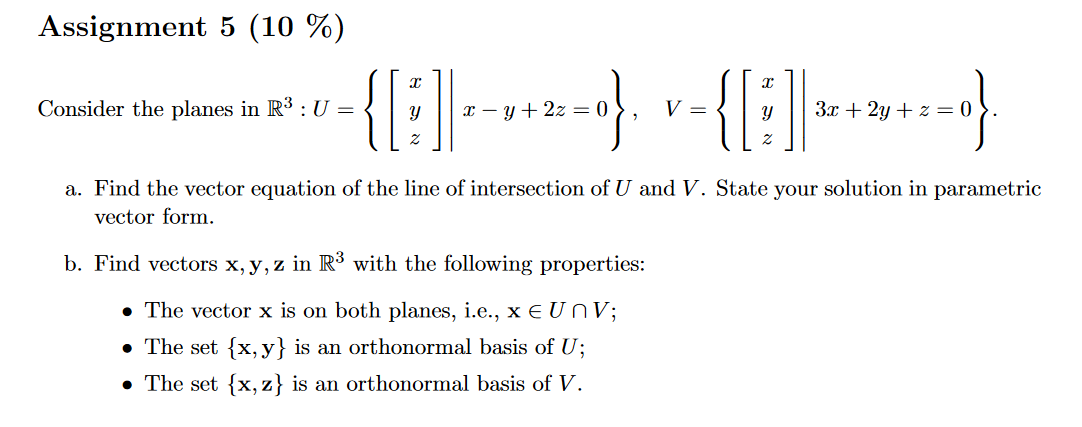

In [7]:
# Method 1: Solve system
sol = solve([x - y + 2*z, 3*x + 2*y + z], [x, y])
direction_param = Matrix([sol[x].coeff(z), sol[y].coeff(z), 1])

print(direction_param)

n1 = Matrix([1, -1, 2])   # Normal to U
n2 = Matrix([3, 2, 1])    # Normal to V
direction = n1.cross(n2)

print("Part a:")
print(f"Vector equation: r = t{list(direction)}")
# Part b: Orthonormal vectors
# x: normalized direction of intersection
x_vec = direction / sqrt(direction.dot(direction))

# y: orthonormal to x, in plane U
u_vector = Matrix([2, 2, 0])  # Vector in U
y_vec = u_vector - u_vector.dot(x_vec) * x_vec
y_vec = y_vec / sqrt(y_vec.dot(y_vec))

# z: orthonormal to x, in plane V  
v_vector = Matrix([1, -3, 3])  # Vector in V
z_vec = v_vector - v_vector.dot(x_vec) * x_vec
z_vec = z_vec / sqrt(z_vec.dot(z_vec))

print("\nPart b:")
print("x ="), sp.pprint(simplify(x_vec))
print("y ="), sp.pprint(simplify(y_vec))
print("z ="), sp.pprint(simplify(z_vec))

# The solution for part b will be three orthonormal vectors:

# x = normalized direction of intersection = [-5, 5, 5]/√75 = [-1, 1, 1]/√3

# y = orthonormal vector in plane U, perpendicular to x

# z = orthonormal vector in plane V, perpendicular to x

# The exact numerical values will be computed by the code, but they'll be in simplified radical form (with square roots).

# Key properties of the solution:

# ||x|| = ||y|| = ||z|| = 1 (unit vectors)
# x·y = 0, x·z = 0 (orthogonal)
# {x, y} spans plane U
# {x, z} spans plane V


TypeError: cannot add <class 'sympy.matrices.dense.MutableDenseMatrix'> and <class 'sympy.core.mul.Mul'>

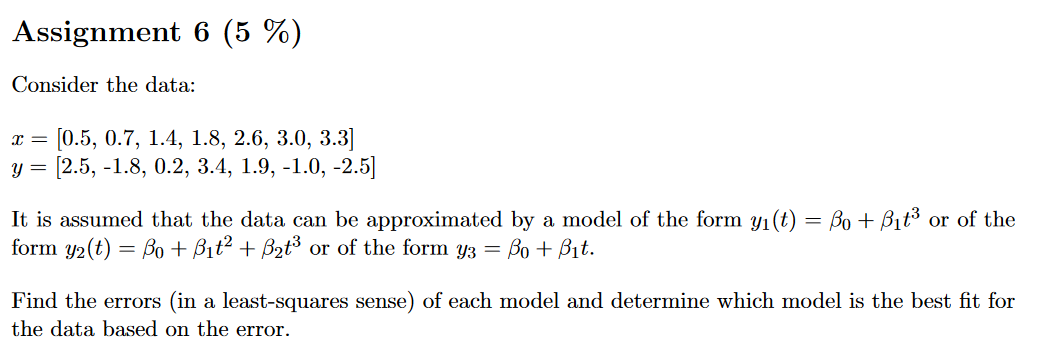

In [ ]:
# Data
x = np.array([0.5, 0.7, 1.4, 1.8, 2.6, 3.0, 3.3])
y = np.array([2.5, -1.8, 0.2, 3.4, 1.9, -1.0, -2.5])

# Design matrices for the three models
X1 = Matrix([ones(len(x), 1)]).row_join(Matrix(x**3))  # Model 1: β0 + β1*t³
X2 = Matrix([ones(len(x), 1)]).row_join(Matrix(x**2)).row_join(Matrix(x**3))  # Model 2: β0 + β1*t² + β2*t³
X3 = Matrix([ones(len(x), 1)]).row_join(Matrix(x))  # Model 3: β0 + β1*t

# Model 1: y1(t) = β0 + β1*t³
X1tX1 = X1.T*X1
X1ty = X1.T*Matrix(y)
Mat, _ = X1tX1.row_join(X1ty).rref()
B1 = Mat[:,-1]
display(Latex("$$y_1(t) = {} + {}t^3$$".format(round(B1[0],4), round(B1[1], 4))))

# Model 2: y2(t) = β0 + β1*t² + β2*t³
X2tX2 = X2.T*X2
X2ty = X2.T*Matrix(y)
Mat, _ = X2tX2.row_join(X2ty).rref()
B2 = Mat[:,-1]
display(Latex("$$y_2(t) = {} + {}t^2 + {}t^3$$".format(round(B2[0],4), round(B2[1], 4), round(B2[2], 4))))

# Model 3: y3(t) = β0 + β1*t
X3tX3 = X3.T*X3
X3ty = X3.T*Matrix(y)
Mat, _ = X3tX3.row_join(X3ty).rref()
B3 = Mat[:,-1]
display(Latex("$$y_3(t) = {} + {}t$$".format(round(B3[0],4), round(B3[1], 4))))

# Calculate errors (least squares sense)
e1 = (Matrix(y) - X1*B1).norm()
e2 = (Matrix(y) - X2*B2).norm()
e3 = (Matrix(y) - X3*B3).norm()

display(Latex("$$e_1 = {}$$".format(round(e1, 4))))
display(Latex("$$e_2 = {}$$".format(round(e2, 4))))
display(Latex("$$e_3 = {}$$".format(round(e3, 4))))

# Determine best model
errors = [float(e1), float(e2), float(e3)]
best_model = errors.index(min(errors)) + 1
display(Latex("$$Best \\ model: \\ Model \\ {}$$".format(best_model)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

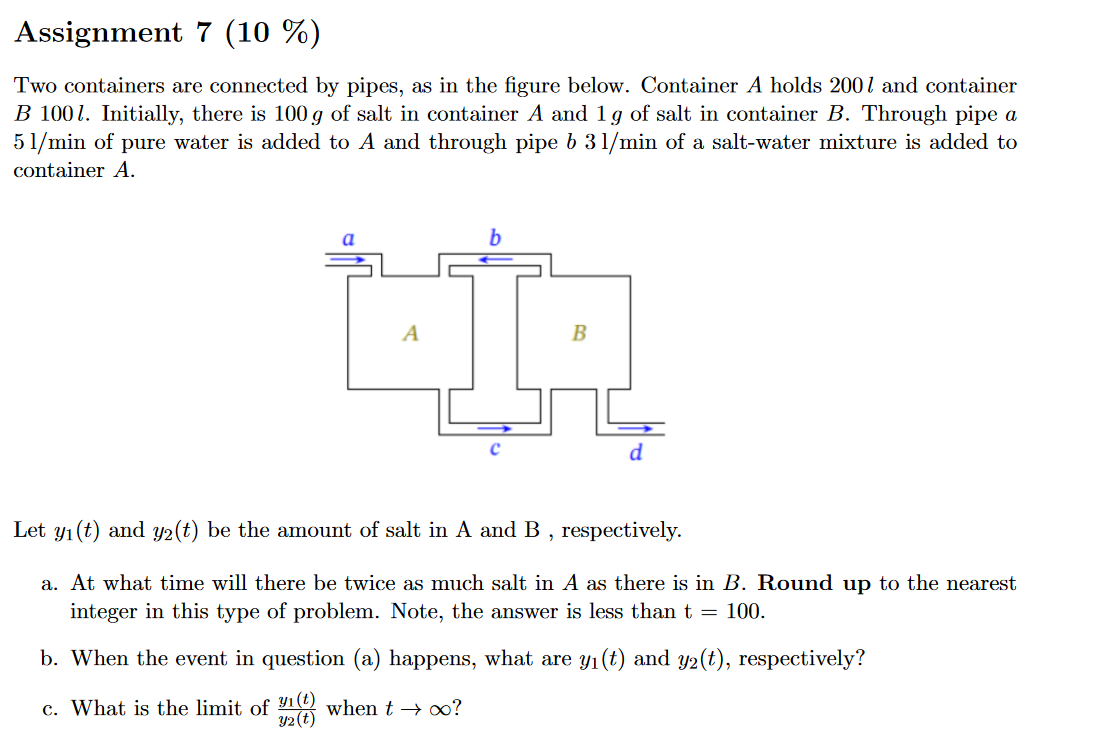

In [ ]:
t = symbols('t', positive=True)
y1, y2 = symbols('y1 y2', cls=Function)

# System: y1'(t) = -8/200*y1(t) + 3/100*y2(t)
#         y2'(t) = 8/200*y1(t) - 8/100*y2(t)
# Initial: y1(0) = 100, y2(0) = 1

eq1 = Eq(y1(t).diff(t), -8/200 * y1(t) + 3/100 * y2(t))
eq2 = Eq(y2(t).diff(t), 8/200 * y1(t) - 8/100 * y2(t))
solutions = dsolve([eq1, eq2], [y1(t), y2(t)], ics={y1(0): 100, y2(0): 1})
y1_sol = solutions[0].rhs
y2_sol = solutions[1].rhs

# a. Find when y1(t) = 2*y2(t)
t_values = solve(Eq(y1_sol, 2*y2_sol), t)
t_answer = min([float(val) for val in t_values if val.is_real and val > 0])



# b. Values at that time
y1_at_t = float(y1_sol.subs(t, t_answer))
y2_at_t = float(y2_sol.subs(t, t_answer))

# c. Limit as t → ∞
ratio_limit = limit(y1_sol/y2_sol, t, oo)

print(f"a. t = {round(t_answer)} minutes")
print(f"b. y1 = {y1_at_t:.2f} g, y2 = {y2_at_t:.2f} g")
print(f"c. Limit = {ratio_limit}")

a. t = 20 minutes
b. y1 = 54.04 g, y2 = 27.02 g
c. Limit = 3/2
